In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/LMEM-SHAP/LMEM_T1D_shared.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/LMEM_T1D_shared.ipynb to html
[NbConvertApp] Writing 1682819 bytes to /content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/LMEM_T1D_shared.html



# Dataset - Protocol

- ## Randomized Crossover Trial
Each participant will undergo four aerobic exercise sessions (in random order) in the CRC, with different strategies for glucose regulation:
  - **Control Trial**: Fasted exercise, no basal insulin reduction
  - **Strategy 1**: Fasted exercise, basal insulin reduction only (50% reduction in basal rate
five minutes before exercise, for the duration of the exercise)
 - **Strategy 2**: Fasted exercise, no basal adjustment + pre-exercise glucose tabs (buccal
route-40 grams in total )
 - **Strategy 3**: Fasted exercise, no basal adjustment + pre-exercise mini-dose glucagon
(sc)

In all 4 sessions, aerobic exercise will be performed in the fasted state (before a standardized meal) for 45 minutes at ~50-55% of the participant’s pre-determined aerobi


<!-- /content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/exercise_protocol.png -->


![picture](https://drive.google.com/uc?id=1i9nvkXdp9wZxMmLlrYFyl2EV1FkMqrnW)
-----------


----------
### **Included Variables**      
 - Time
 - PtId
 - 'Glucose [mg/dL]',
 - 'Timepoint [min]',
 - 'HeartRate [BPM]',
 - 'Cortisol [ug/dl]',
 - 'lactate [mmol/L]',
 - 'Glucagon [pg/ml]',
 - 'Insulin [uIU/ml]',
 - BHB (β-Hydroxybutyric acid) - the main ketone body produced during ketosis
------

### **Removed Variables** 

- All patients have StratMDGAmt = 150 (so it can be removed)

- Only one MDGAmt=150 value (removed)

- **MDGAmt**: Amount of MDG Treatment Administered to Participant (75-150-300)
- **StratMDGAmt**: Amount of First Treatment Administered to Participant: Mini-Dose glucagon (75-150-300)

- StratGlucTabAmt=20 for all patients (removed)
- TrtAgainGlucTabAmt = 20 for all patients (removed)
- HypoTrtGlucTab=nan for all (removed) (patients in df_not{2 , 15 , 18} and patients{2, 10 , 16} in df_dec had "HypoTrtGlucTab" ==1

- 'Carbohydrate [gram]' =47 grams for all (removed)

 -'Growth Hormone [ng/ml]',
 -TNFA: Tumour necrosis factor-alpha plasma level
- NEFA: nonesterified fatty acids (NEFAs)

- PercExert (perceived exertion Borg scale): The original **Borg scale** has a range from 6 to 20 (with 6 being no exertion at all, and 20 being maximum effort). This scale **correlates with a person's heart rate or how hard they feel they're working**


- IL6" is a pleiotropic cytokine with broad-ranging effects within the integrated immune response. One of the roles of IL-6 is to support immunocompetence, defined as the ability of a host to respond to infections


-----------

### What is Diabetic ketoacidosis (DKA):

 DKA is no joke, it’s a serious condition that can lead to diabetic coma or even death. DKA is caused by an overload of ketones present in your blood. 

When your cells don't get the glucose they need for energy, your body begins to burn fat for energy, which produces **ketones**. Ketones are chemicals that the body creates when it breaks down fat to use for energy. The body does this when it doesn’t have enough insulin to use glucose, the body’s normal source of energy. When ketones build up in the blood, they make it more acidic. They are a warning sign that your diabetes is out of control or that you are getting sick.

--------

## Standardized Meal Intake (Snack Time)

- participant will rest for 30 minutes after Exercise session ends
- Meal intake at Timepoint = 75 minute (45-50 grams of carbs)
- Bolus Insulin is administered at Timepoint = 70th minute (5 minutes before meal)

 - If **post exercise/ pre meal hyperglycemia ≥270** =======> insulin **“corrections”** will not be given
 - If **pre-meal hypoglycemia** occurs ====> 20 grams of fast acting carbohydrate 
 - Participant will be monitored for at least 2 hours after the meal prior to discharge.



##  Sample collection
Blood samples collected through a venous catheter with plasma glucose measured by an YSI analyzer. Blood samples will be collected at:
- Baseline (at -30, -15, -5, 0 min)
- During exercise (at 5, 10, 15, 25, 35, 45 min)
- In recovery post exercise (at 50, 55, 60, 75 min)
- Regularly following a standardized mixed meal for 90 minutes (at 90, 105, 120, 135, and 165 min)



.

**Timepoint =0** is the starting point of the Exercise Session

We can see that there are 15 samples (with 5 to 15 minutes sampling rates) are there after the starting point of the exrecise for upto around **2:30** hours after that. 

**for example in this particular example, exercise starts at 8:40 and the last recorded Glucagon and Insulin values are at 11:15** 

![picture](https://drive.google.com/uc?id=1dfxK_AuIhcUZwmpy259Ho5-uR19omCob)



# ------------------------------------------------------------------------------------------------
# Linear MIxed Effect Model

## The interpretation of the fixed factors VS random factors

- Fixed effects carry the assumption that the means are independent and they share the residual variance;-----the coefficient for a fixed effect models the unit change that occurs in the dependent variable with a 1 unit increase in the independent variable
- Random effects, the clustering classification variable (level 2, 3, n), assumes the variable means are a sample of a larger population that has it's own mean and variance. -------- he coefficient for a random intercept models the deviation from the intercept. The deviation can be displayed as variance or standard deviation

------
## Outcomes used in Pasta Paper
1. **Peak of Glucose**: Only 5-h postprandial {CGM (t) - CGM(0)} was considered in computations
2. **percentage of the time that glucose was <70 mg/dL** for the 5-h, In instances of post- prandial hypoglycemia, postprandial period.
3. **AUC (mg/dL · min)**:  (total AUC, mg/dL · min),
4. **Time to Peak (Min)**:  time to peak glucose level (in minutes from intervention)

**LMEM:**
- These 4 outcomes were considered as **Dependent** Variables inb LMEM
- Meal type is included as a fixed effect

**Subanalysis:** 
- To test any differences in comple- mentary metrics (meal insulin bolus, baseline CGM glucose level) was performed using a **one-way ANOVA** test

- **Kolmogorov–Smirnov** test was performed to examine if there were differences in the underlying distributions of AUC

# Data loader and creating DFs

In [1]:
!pip3 install researchpy
import numpy as np
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

    
%load_ext google.colab.data_table

# %unload_ext google.colab.data_table

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df_not = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/preprocessed_data/df_not_14hours_index_aligned.csv',index_col=0).rename(columns={"Carbohydrate [gram]": "Carbs"})
df_dec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/preprocessed_data/df_dec_14hours_index_aligned.csv',index_col=0).rename(columns={"Carbohydrate [gram]": "Carbs"})
df_mdg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/preprocessed_data/df_mdg_14hours_index_aligned.csv',index_col=0).rename(columns={"Carbohydrate [gram]": "Carbs"})
df_tabs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/preprocessed_data/df_tabs_14hours_index_aligned.csv',index_col=0).rename(columns={"Carbohydrate [gram]": "Carbs"})

In [3]:
droped_cols= ['BHB [umol/L]','Glucagon [pg/ml]','ParentLoginVisitID', 'Lab Glucose', 'Cortisol [ug/dl]' ,'Growth Hormone [ng/ml]', 'IL6 [pg/ml]', 'Insulin [uIU/ml]',
              'lactate [mmol/L]', 'NEFA [mEq/L]', 'TNFA [pg/ml]','HeartRate [BPM]',
              'Glucose [mg/dL]','Timepoint [min]', 'MDGAmt',
              'StratGlucTabAmt', 'TrtAgainGlucTabAmt', 'StratMDGAmt' , 'DayExercise'  , 'Lab Glucose [mg/dL]', 'HypoTrtGlucTab',
                'Growth Hormone', 'IL6', 'NEFA', 'TNFa', 'PercExert']

In [4]:
remained_cols = [i for i in df_tabs.drop(columns=droped_cols).columns]
remained_cols , len(remained_cols)

(['Time',
  'PtID',
  'Glucose',
  'HeartRate',
  'Strategy',
  'Timepoint',
  'BHB',
  'Cortisol',
  'Glucagon',
  'Insulin',
  'lactate',
  'Carbs'],
 12)

In [5]:
# Run this cell to see which variables need to be removed (if not enough number of values available the variable is removed)
# df_not[remained_cols][~ df_not['HypoTrtGlucTab'].isna()]

In [6]:
df_not_ex = df_not[remained_cols]
df_tabs_ex= df_tabs[remained_cols]
df_mdg_ex= df_mdg[remained_cols]
df_dec_ex= df_dec[remained_cols]


In [7]:
df_not.shape , df_dec.shape , df_mdg.shape , df_tabs.shape , 

((10080, 38), (10920, 38), (11760, 38), (10920, 38))

In [8]:
df_not_ex.shape , df_dec_ex.shape , df_mdg_ex.shape , df_tabs_ex.shape

((10080, 12), (10920, 12), (11760, 12), (10920, 12))

In [9]:
print(len(df_tabs_ex.PtID.unique()), 
      len(df_not_ex.PtID.unique()), 
      len(df_dec_ex.PtID.unique()), 
      len(df_mdg_ex.PtID.unique()))



13 12 13 14


# Initial Plots

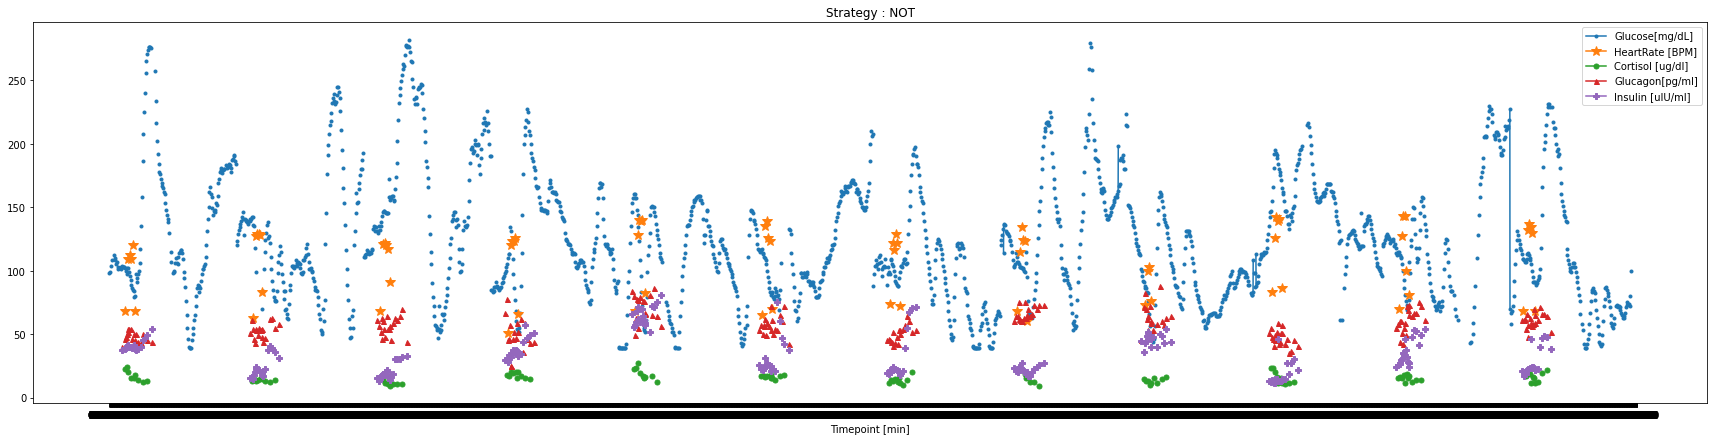

In [ ]:
# df_not_ex.info()
labels_ = ['Glucose[mg/dL]', 'HeartRate [BPM]' , 'Cortisol [ug/dl]', 'Glucagon[pg/ml]','Insulin [uIU/ml]', 'Carbohydrate [gram]' ]
plt.figure(figsize=(30,7))
plt.plot(df_not_ex.loc[:,['Glucose']], marker='.', label = 'Glucose[mg/dL]')
plt.plot(df_not_ex.loc[:,['HeartRate']], marker='*',  markersize=10, label= 'HeartRate [BPM]') 
plt.plot(df_not_ex.loc[:,['Cortisol']], marker='o',  markersize=5, label= 'Cortisol [ug/dl]') 
plt.plot(df_not_ex.loc[:,['Glucagon']], marker="^",  markersize=5, label= 'Glucagon[pg/ml]') 
plt.plot(df_not_ex.loc[:,['Insulin']], marker="P",  markersize=6, label= 'Insulin [uIU/ml]') 
# plt.plot(df_not_ex.loc[:,['Carbohydrate [gram]']], marker="o",  markersize=7, label= 'Carbohydrate [gram]') 
# plt.plot(df_not_ex.reset_index().loc[:,['BHB [umol/L]']], marker="D",  markersize=5, label = 'BHB [umol/L]') 

# plt.plot(df_not_ex.loc[:,['HeartRate']], marker="^",  markersize=5) 

# plt.xticks( labels= [str(i) for i in np.arange(0 , len(df_not_ex)+1, 30)], 
#            ticks = np.arange(0 , len(df_not_ex)+1, 30))
plt.title('Strategy : ' + df_not.Strategy.unique()[0])
plt.xlabel('Timepoint [min]')
plt.legend(labels_)
plt.xticks(range(len(df_not_ex.Time)), df_not_ex.Time)

plt.show()


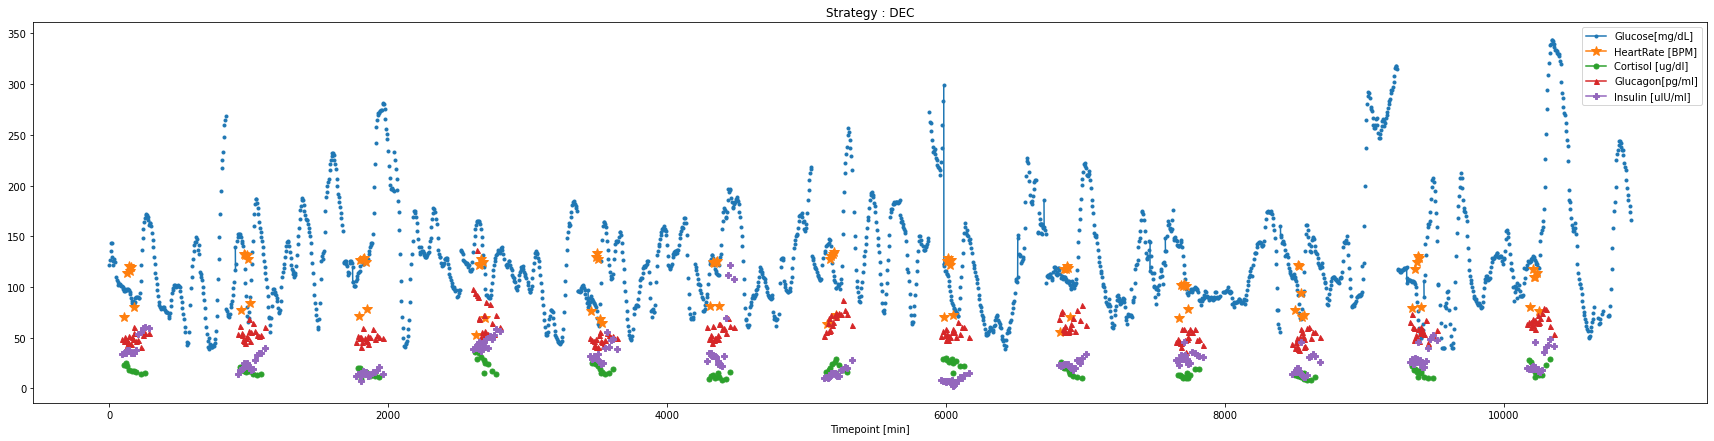

In [ ]:
# df_dec_ex.info()

plt.figure(figsize=(30,7))
plt.plot(df_dec_ex.reset_index().loc[:,['Glucose']], marker='.', label = 'Glucose [mg/dL]')
plt.plot(df_dec_ex.reset_index().loc[:,['HeartRate']], marker='*',  markersize=10, label= 'HeartRate [BPM]') 
plt.plot(df_dec_ex.reset_index().loc[:,['Cortisol']], marker='o',  markersize=5, label= 'Cortisol [ug/dl') 
plt.plot(df_dec_ex.reset_index().loc[:,['Glucagon']], marker="^",  markersize=5, label= 'Glucagon[pg/ml]') 

plt.plot(df_dec_ex.reset_index().loc[:,['Insulin']], marker="P",  markersize=6, label= 'Insulin [uIU/ml]') 
# plt.plot(df_dec_ex.reset_index().loc[:,['Carbohydrate [gram]']], marker="o",  markersize=7, label= 'Carbohydrate [gram]') 
# plt.plot(df_dec_ex.reset_index().loc[:,['BHB [umol/L]']], marker="D",  markersize=5, label = 'BHB [umol/L]') 

# plt.plot(df_dec_ex.loc[:,['HeartRate']], marker="^",  markersize=5) 

# plt.xticks( labels= [str(i) for i in np.arange(0 , len(df_dec_ex)+1, 30)], 
#            ticks = np.arange(0 , len(df_dec_ex)+1, 30))
plt.title('Strategy : ' + df_dec.Strategy.unique()[0])
plt.xlabel('Timepoint [min]')
plt.legend(labels_)

plt.show()

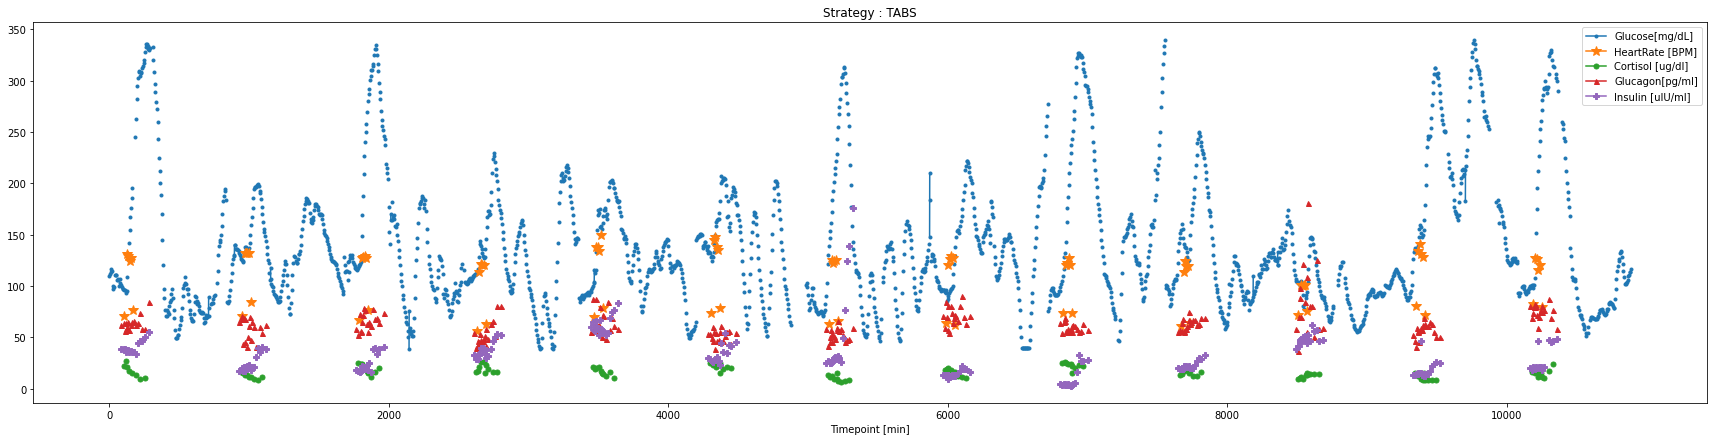

In [ ]:
# df_tabs_ex.info()

plt.figure(figsize=(30,7))
plt.plot(df_tabs_ex.reset_index().loc[:,['Glucose']], marker='.', label = 'Glucose [mg/dL]')
plt.plot(df_tabs_ex.reset_index().loc[:,['HeartRate']], marker='*',  markersize=10, label= 'HeartRate [BPM]') 
plt.plot(df_tabs_ex.reset_index().loc[:,['Cortisol']], marker='o',  markersize=5, label= 'Cortisol [ug/dl]') 
plt.plot(df_tabs_ex.reset_index().loc[:,['Glucagon']], marker="^",  markersize=5, label= 'Glucagon [pg/ml]') 

plt.plot(df_tabs_ex.reset_index().loc[:,['Insulin']], marker="P",  markersize=6, label= 'Insulin [uIU/ml]') 
# plt.plot(df_tabs_ex.reset_index().loc[:,['Carbohydrate [gram]']], marker="o",  markersize=7, label= 'Carbohydrate [gram]') 
# plt.plot(df_tabs_ex.reset_index().loc[:,['BHB [umol/L]']], marker="D",  markersize=5, label = 'BHB [umol/L]') 

# plt.plot(df_tabs_ex.loc[:,['HeartRate']], marker="^",  markersize=5) 

# plt.xticks( labels= [str(i) for i in np.arange(0 , len(df_tabs_ex)+1, 30)], 
#            ticks = np.arange(0 , len(df_tabs_ex)+1, 30))
plt.title('Strategy : ' + df_tabs.Strategy.unique()[0])
plt.xlabel('Timepoint [min]')
plt.legend(labels_)

plt.show()

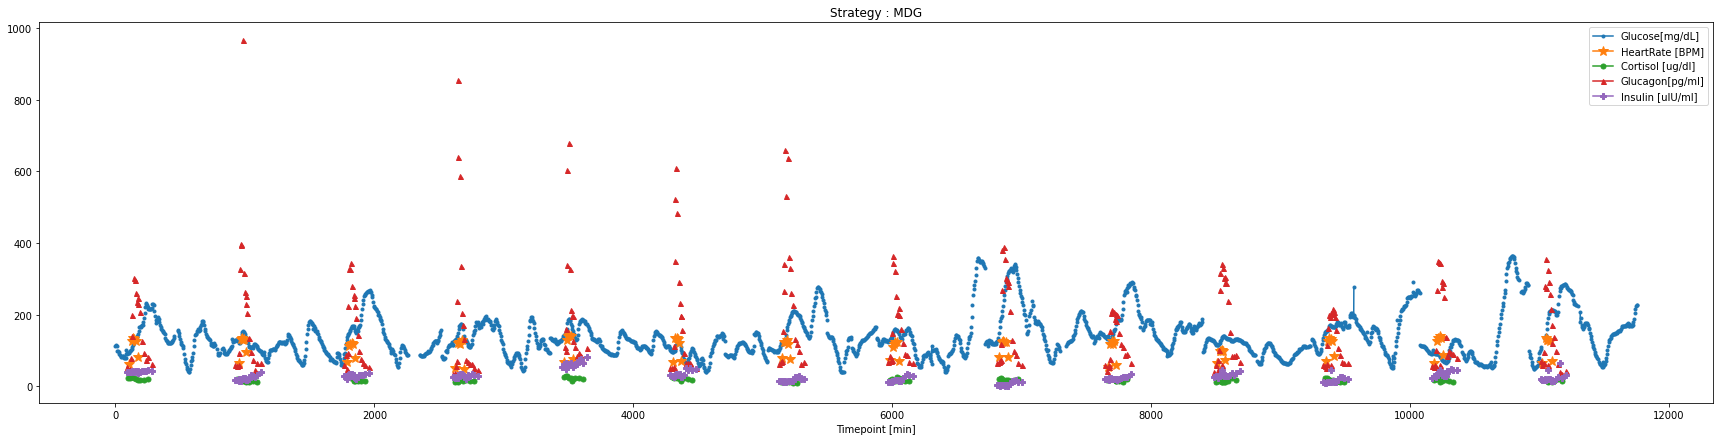

In [ ]:
# df_mdg_ex.info()

plt.figure(figsize=(30,7))
plt.plot(df_mdg_ex.reset_index().loc[:,['Glucose']], marker='.', label = 'Glucose [mg/dL]')
plt.plot(df_mdg_ex.reset_index().loc[:,['HeartRate']], marker='*',  markersize=10, label= 'HeartRate [BPM]') 
plt.plot(df_mdg_ex.reset_index().loc[:,['Cortisol']], marker='o',  markersize=5, label= 'Cortisol [ug/dl]') 
plt.plot(df_mdg_ex.reset_index().loc[:,['Glucagon']], marker="^",  markersize=5, label= 'Glucagon [pg/ml]') 

plt.plot(df_mdg_ex.reset_index().loc[:,['Insulin']], marker="P",  markersize=6, label= 'Insulin [uIU/ml]') 
# plt.plot(df_mdg_ex.reset_index().loc[:,['Carbohydrate [gram]']], marker="o",  markersize=7, label= 'Carbohydrate [gram]') 
# plt.plot(df_mdg_ex.reset_index().loc[:,['BHB [umol/L]']], marker="D",  markersize=5, label = 'BHB [umol/L]') 

# plt.plot(df_mdg_ex.loc[:,['HeartRate']], marker="^",  markersize=5) 

# plt.xticks( labels= [str(i) for i in np.arange(0 , len(df_mdg_ex)+1, 30)], 
#            ticks = np.arange(0 , len(df_mdg_ex)+1, 30))
plt.title('Strategy : ' + df_mdg.Strategy.unique()[0])
plt.xlabel('Timepoint [min]')
plt.legend(labels_)

plt.show()

In [ ]:
for i in df_mdg_ex.PtID.unique():
  print(i , len(df_mdg_ex.loc[df_mdg_ex.PtID==i]))

1 840
2 840
5 840
6 840
9 840
10 840
11 840
12 840
13 840
14 840
15 840
16 840
18 840
19 840


# Plotting and making PW data

In [10]:
# plt.figure(figsize=(30,7))
# for i in df_not_ex.PtID.unique():
#   df_not_ex_baseline_removed  = df_not_ex[df_not_ex.PtID==i].loc[:,['Glucose']] - df_not_ex[df_not_ex.PtID==i].loc[:,['Glucose']].values[0][0]
#   df_not_ex_baseline_removed = df_not_ex_baseline_removed.reset_index(drop=True).iloc[:840]
#   plt.plot(df_not_ex_baseline_removed, marker='.', label = 'Glucose')

In [11]:
# df_dec_ex['datetime']= pd.to_datetime(df_dec_ex.Time, format='%Y-%m-%d %H:%M', errors='ignore')


In [12]:
# new_time= pd.date_range(pd.to_datetime(df_dec_ex.Time).Time[0],  format='%Y-%m-%d %H:%M', errors='ignore')
# df_dec_ex

In [10]:
df_dec_ex.columns

Index(['Time', 'PtID', 'Glucose', 'HeartRate', 'Strategy', 'Timepoint', 'BHB',
       'Cortisol', 'Glucagon', 'Insulin', 'lactate', 'Carbs'],
      dtype='object')

In [11]:
#Run this cell to get the rows (timepoints) where Carbohydrate is taken ---  for all Arms and all patients, 47 grams of Carbs is taken at **Timepoint ==75**

# df_tabs[~df_tabs['Carbohydrate [gram]'].isna()].Timepoint

# Resampling to 5 minutes


In [12]:
##################################################################################################################################################################
###################### Number of samples for each PtID after resampling is 168 (120 samples pre-session and 720 samples after session)############################
##################################################################################################################################################################
df_not_ex['new_time'] = pd.date_range(df_not_ex.Time[0],  periods=len(df_not_ex), freq='T')
df_not_ex.set_index(keys='new_time', inplace=True)
df_not_res = df_not_ex.loc[:, ('Glucose', 'HeartRate', 'BHB', 'lactate', 'Glucagon', 'Cortisol')].resample('5Min', origin='start').mean()
# df_not_res_sum = df_not_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
# df_not_res = pd.concat([df_not_res_mean,df_not_res_sum ])
df_not_res['Timepoint']=df_not_ex.Timepoint[::5]
df_not_res['Insulin']=df_not_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
df_not_res['Carbs']=df_not_ex.loc[:, ('Carbs')].resample('5Min', origin='start').sum()
df_not_res['Strategy'] = df_not_ex.Strategy
df_not_res['PtID'] = df_not_ex.PtID
df_not_res =df_not_res.round(2)


df_dec_ex['new_time'] = pd.date_range(df_dec_ex.Time[0],  periods=len(df_dec_ex), freq='T')
df_dec_ex.set_index(keys='new_time', inplace=True)
df_dec_res = df_dec_ex.loc[:, ('Glucose', 'HeartRate', 'BHB', 'lactate', 'Glucagon', 'Cortisol')].resample('5Min', origin='start').mean()
# df_dec_res_sum = df_dec_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
# df_dec_res = pd.concat([df_dec_res_mean,df_dec_res_sum ])
df_dec_res['Timepoint']=df_dec_ex.Timepoint[::5]
df_dec_res['Insulin']=df_dec_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
df_dec_res['Carbs']=df_dec_ex.loc[:, ('Carbs')].resample('5Min', origin='start').sum()
df_dec_res['Strategy'] = df_dec_ex.Strategy
df_dec_res['PtID'] = df_dec_ex.PtID
df_dec_res =df_dec_res.round(2)



df_tabs_ex['new_time'] = pd.date_range(df_tabs_ex.Time[0],  periods=len(df_tabs_ex), freq='T')
df_tabs_ex.set_index(keys='new_time', inplace=True)
df_tabs_res = df_tabs_ex.loc[:, ('Glucose', 'HeartRate', 'BHB', 'lactate', 'Glucagon', 'Cortisol')].resample('5Min', origin='start').mean()
# df_tabs_res_sum = df_tabs_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
# df_tabs_res = pd.concat([df_tabs_res_mean,df_tabs_res_sum ])
df_tabs_res['Timepoint']=df_tabs_ex.Timepoint[::5]
df_tabs_res['Insulin']=df_tabs_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
df_tabs_res['Carbs']=df_tabs_ex.loc[:, ('Carbs')].resample('5Min', origin='start').sum()
df_tabs_res['Strategy'] = df_tabs_ex.Strategy
df_tabs_res['PtID'] = df_tabs_ex.PtID
df_tabs_res =df_tabs_res.round(2)


df_mdg_ex['new_time'] = pd.date_range(df_mdg_ex.Time[0],  periods=len(df_mdg_ex), freq='T')
df_mdg_ex.set_index(keys='new_time', inplace=True)
df_mdg_res = df_mdg_ex.loc[:, ('Glucose', 'HeartRate', 'BHB', 'lactate', 'Glucagon', 'Cortisol')].resample('5Min', origin='start').mean()
# df_mdg_res_sum = df_mdg_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
# df_mdg_res = pd.concat([df_mdg_res_mean,df_mdg_res_sum ])
df_mdg_res['Timepoint']=df_mdg_ex.Timepoint[::5]
df_mdg_res['Insulin']=df_mdg_ex.loc[:, ('Insulin')].resample('5Min', origin='start').sum()
df_mdg_res['Carbs']=df_mdg_ex.loc[:, ('Carbs')].resample('5Min', origin='start').sum()
df_mdg_res['Strategy'] = df_mdg_ex.Strategy
df_mdg_res['PtID'] = df_mdg_ex.PtID
df_mdg_res =df_mdg_res.round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [16]:
#Obtained resampled dataframes:
# df_mdg_res, df_tabs_res, df_not_res, df_dec_res


# Plotting Patient-wise boxplots (resembling Figiue 1 in Pasta Paper)

In [13]:
# #plotting the patient-wise boxplot

# plt.rcParams.update({'font.size': 16})

# df_tabs_ex_pw = pd.DataFrame()

# for patient_id in df_tabs_res.PtID.unique():
#   df_tabs_ex_pw['PtID_'+str(patient_id)] = df_tabs_res[df_tabs_res.PtID==patient_id].Insulin.reset_index(drop=True) - df_tabs_res[df_tabs_res.PtID==patient_id].Insulin.iloc[0]


# df_tabs_ex_pw.reset_index(drop=True).T.boxplot(grid=False, figsize=(30,7))
# plt.plot(df_tabs_ex_pw.reset_index(drop=True).T.mean(), 'r', label='Mean CGM')
# plt.ylim([-150,260])
# plt.xlim([0,len(df_tabs_ex_pw)+2])

# plt.axvline(x =120/5, color = 'green', label = 'Exrecise Start', alpha=0.6, linestyle='--')
# plt.axvline(x =(120+45)/5, color = 'cyan', label = 'Exrecise End', alpha=0.6, linestyle='--')
# plt.axvline(x =(120+70)/5, color = 'black', label = 'Meal Boluses Intake ', alpha=0.6,linestyle='--')
# plt.axvline(x =(120+75)/5, color = 'purple', label = 'Standardize Meal Intake ', alpha=0.6,linestyle='--')

# plt.locator_params(axis='x', nbins=14)
# plt.xticks(ticks=np.arange(0, len(df_tabs_ex_pw)+1, 12), labels=range(-2,13))
# plt.legend()
# plt.xlabel('Time Point [hours]')
# plt.ylabel('CGM [mg/Dl] \n' '(Corrected at Baseline by Subtracting the initial CGM Value)' )
# plt.title('CGM Distribution among all Patient for each time point from -2 hours before through 12 hours after the exercise under conditions of no intervention')




# plt.show()

In [23]:
plt.rcParams.update({'font.size': 25})


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


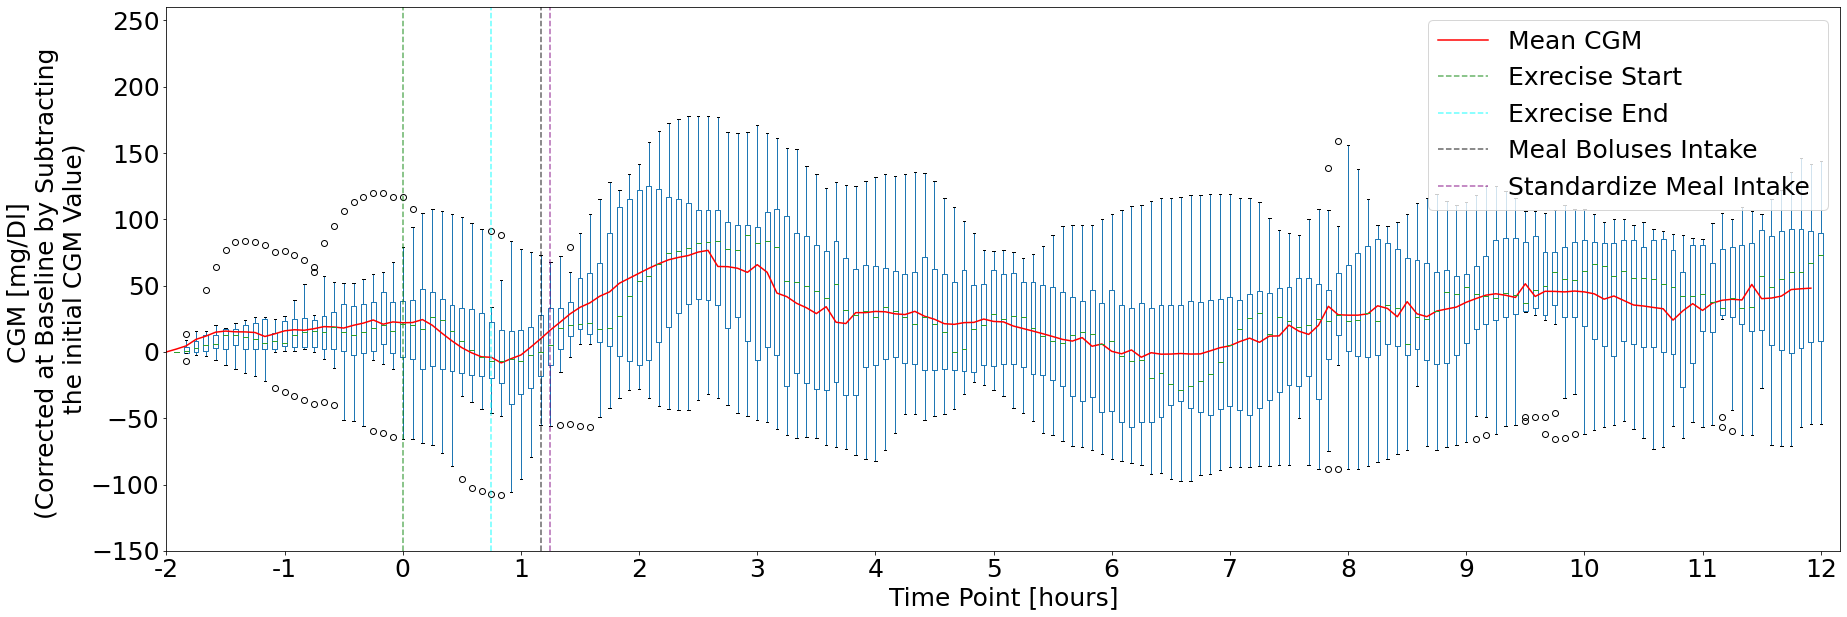

In [28]:
#plotting the patient-wise boxplot


df_not_ex_pw = pd.DataFrame()

for patient_id in df_not_res.PtID.unique():
  df_not_ex_pw['PtID_'+str(patient_id)] = df_not_res[df_not_res.PtID==patient_id].Glucose.reset_index(drop=True) - df_not_res[df_not_res.PtID==patient_id].Glucose.iloc[0]


df_not_ex_pw.reset_index(drop=True).T.boxplot(grid=False, figsize=(30,10))
plt.plot(df_not_ex_pw.reset_index(drop=True).T.mean(), 'r', label='Mean CGM')
plt.ylim([-150,260])
plt.xlim([0,len(df_not_ex_pw)+2])

plt.axvline(x =120/5, color = 'green', label = 'Exrecise Start', alpha=0.6, linestyle='--')
plt.axvline(x =(120+45)/5, color = 'cyan', label = 'Exrecise End', alpha=0.6, linestyle='--')
plt.axvline(x =(120+70)/5, color = 'black', label = 'Meal Boluses Intake ', alpha=0.6,linestyle='--')
plt.axvline(x =(120+75)/5, color = 'purple', label = 'Standardize Meal Intake ', alpha=0.6,linestyle='--')

plt.locator_params(axis='x', nbins=14)
plt.xticks(ticks=np.arange(0, len(df_not_ex_pw)+1, 12), labels=range(-2,13))
plt.legend(loc=1)
plt.xlabel('Time Point [hours]')
plt.ylabel('CGM [mg/Dl] \n' '(Corrected at Baseline by Subtracting \n' 'the initial CGM Value)' )
# plt.title('CGM Distribution among all Patient for each time point from -2 hours before through 12 hours after the exercise under conditions of no intervention')


plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/boxplot_data_distribution_not.png', dpi=200)


plt.show()

In [ ]:
# plt.figure(figsize=(30,7))
# for i in df_dec_ex.PtID.unique():
#   df_dec_ex_baseline_removed  = df_dec_ex[df_dec_ex.PtID==i].loc[:,['Glucose']] - df_dec_ex[df_dec_ex.PtID==i].loc[:,['Glucose']].values[0][0]
#   df_dec_ex_baseline_removed = df_dec_ex_baseline_removed.reset_index(drop=True)
#   plt.plot(df_dec_ex_baseline_removed, marker='.', label = 'Glucose')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


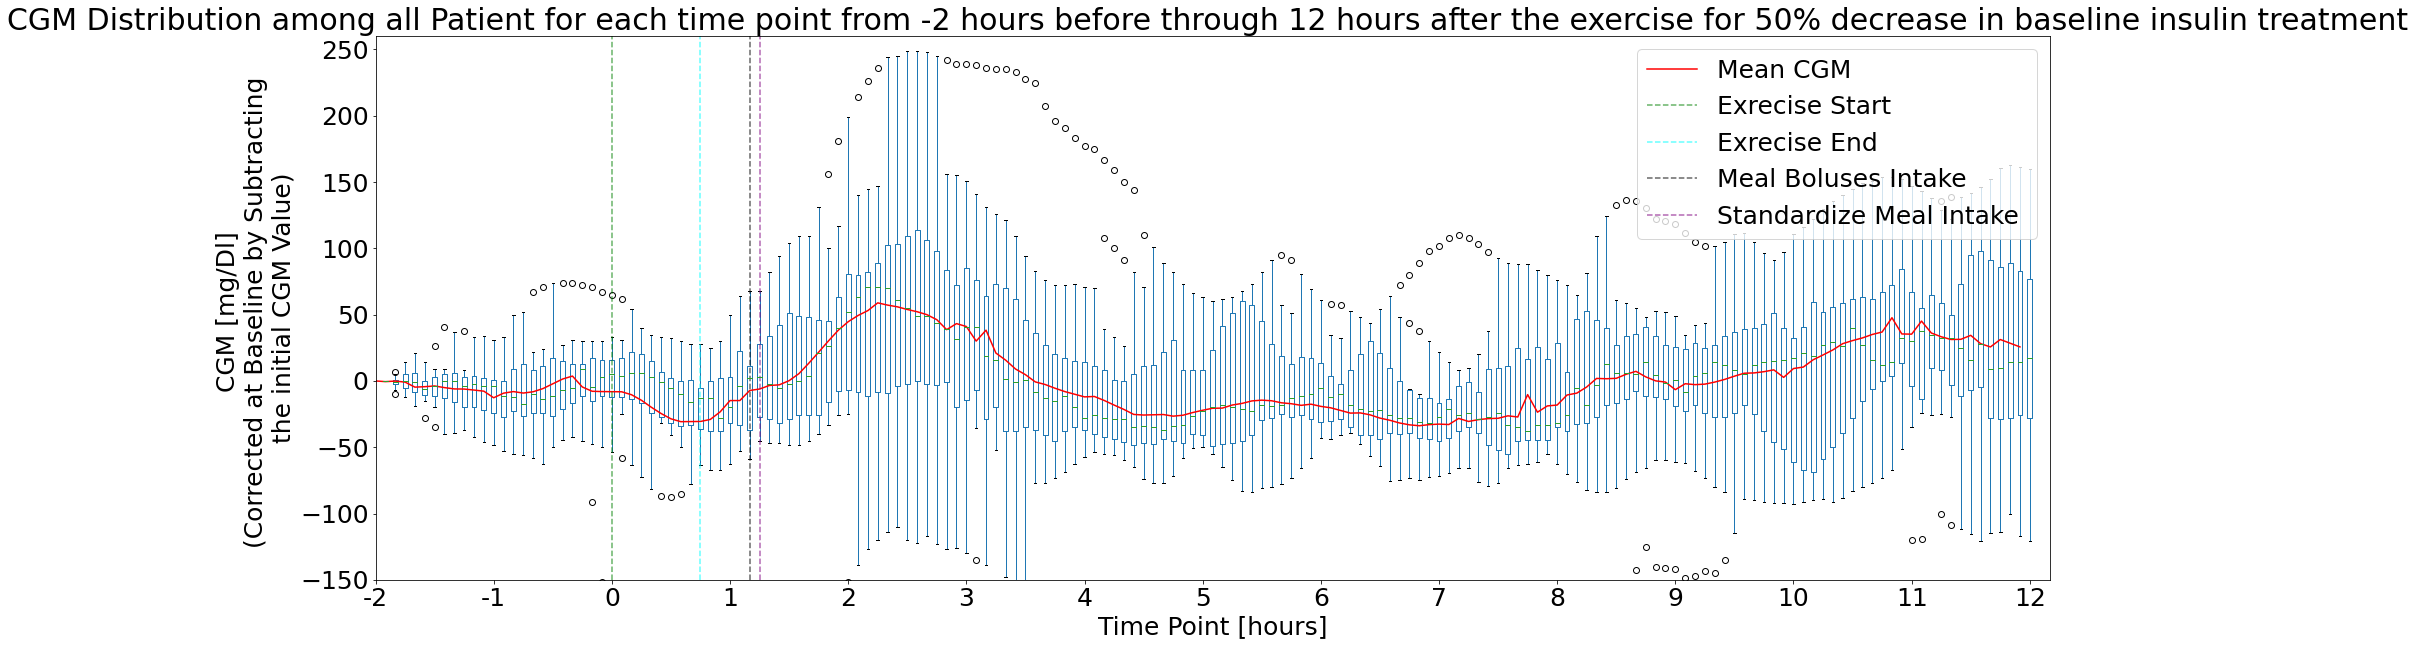

In [29]:
#plotting the patient-wise boxplot

df_dec_ex_pw = pd.DataFrame()

for patient_id in df_dec_res.PtID.unique():
  df_dec_ex_pw['PtID_'+str(patient_id)] = df_dec_res[df_dec_res.PtID==patient_id].Glucose.reset_index(drop=True) - df_dec_res[df_dec_res.PtID==patient_id].Glucose.iloc[0]


df_dec_ex_pw.reset_index(drop=True).T.boxplot(grid=False, figsize=(30,10))
plt.plot(df_dec_ex_pw.reset_index(drop=True).T.mean(), 'r', label='Mean CGM')
plt.ylim([-150,260])
plt.xlim([0,len(df_dec_ex_pw)+2])


plt.axvline(x =120/5, color = 'green', label = 'Exrecise Start', alpha=0.6, linestyle='--')
plt.axvline(x =(120+45)/5, color = 'cyan', label = 'Exrecise End', alpha=0.6, linestyle='--')
plt.axvline(x =(120+70)/5, color = 'black', label = 'Meal Boluses Intake ', alpha=0.6,linestyle='--')
plt.axvline(x =(120+75)/5, color = 'purple', label = 'Standardize Meal Intake ', alpha=0.6,linestyle='--')
plt.locator_params(axis='x', nbins=14)
plt.xticks(ticks=np.arange(0, len(df_not_ex_pw)+1, 12), labels=range(-2,13))
plt.legend(loc=1)
plt.xlabel('Time Point [hours]')
plt.ylabel('CGM [mg/Dl] \n' '(Corrected at Baseline by Subtracting \n' 'the initial CGM Value)' )
plt.title('CGM Distribution among all Patient for each time point from -2 hours before through 12 hours after the exercise for 50% decrease in baseline insulin treatment ')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/boxplot_data_distribution_dec.png', dpi=200)


plt.show()

In [ ]:
# plt.figure(figsize=(30,7))
# for i in df_tabs_ex.PtID.unique():
#   df_tabs_ex_baseline_removed  = df_tabs_ex[df_tabs_ex.PtID==i].loc[:,['Glucose']] - df_tabs_ex[df_tabs_ex.PtID==i].loc[:,['Glucose']].values[0][0]
#   df_tabs_ex_baseline_removed = df_tabs_ex_baseline_removed.reset_index(drop=True)
#   plt.plot(df_tabs_ex_baseline_removed, marker='.', label = 'Glucose')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


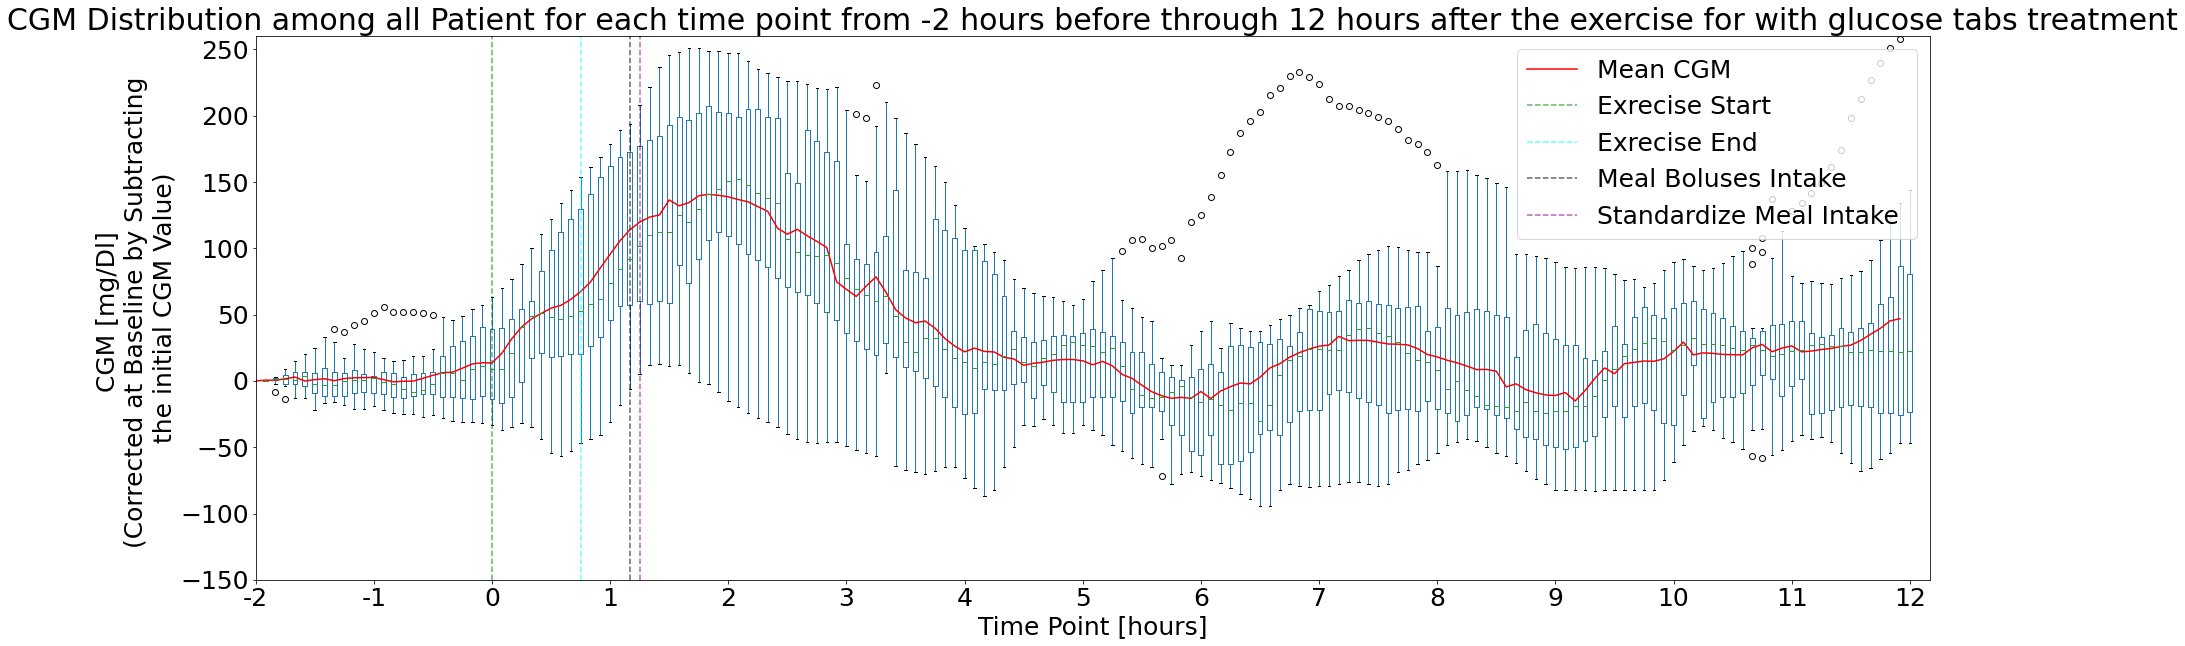

In [30]:
#plotting the patient-wise boxplot

df_tabs_ex_pw = pd.DataFrame()

for patient_id in df_tabs_res.PtID.unique():
  df_tabs_ex_pw['PtID_'+str(patient_id)] = df_tabs_res[df_tabs_res.PtID==patient_id].Glucose.reset_index(drop=True) - df_tabs_res[df_tabs_res.PtID==patient_id].Glucose.iloc[0]


df_tabs_ex_pw.reset_index(drop=True).T.boxplot(grid=False, figsize=(30,10))
plt.plot(df_tabs_ex_pw.reset_index(drop=True).T.mean(), 'r', label='Mean CGM')
plt.ylim([-150,260])
plt.xlim([0,len(df_tabs_ex_pw)+2])

plt.axvline(x =120/5, color = 'green', label = 'Exrecise Start', alpha=0.6, linestyle='--')
plt.axvline(x =(120+45)/5, color = 'cyan', label = 'Exrecise End', alpha=0.6, linestyle='--')
plt.axvline(x =(120+70)/5, color = 'black', label = 'Meal Boluses Intake ', alpha=0.6,linestyle='--')
plt.axvline(x =(120+75)/5, color = 'purple', label = 'Standardize Meal Intake ', alpha=0.6,linestyle='--')
plt.locator_params(axis='x', nbins=14)
plt.xticks(ticks=np.arange(0, len(df_not_ex_pw)+1, 12), labels=range(-2,13))
plt.legend(loc=1)
plt.xlabel('Time Point [hours]')
plt.ylabel('CGM [mg/Dl] \n' '(Corrected at Baseline by Subtracting \n' 'the initial CGM Value)' )
plt.title('CGM Distribution among all Patient for each time point from -2 hours before through 12 hours after the exercise for with glucose tabs treatment')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/boxplot_data_distribution_tabs.png', dpi=200)

plt.show()

In [ ]:
# plt.figure(figsize=(30,7))
# for i in df_mdg_ex.PtID.unique():
#   df_mdg_ex_baseline_removed  = df_mdg_ex[df_mdg_ex.PtID==i].loc[:,['Glucose']] - df_mdg_ex[df_mdg_ex.PtID==i].loc[:,['Glucose']].values[0][0]
#   df_mdg_ex_baseline_removed = df_mdg_ex_baseline_removed.reset_index(drop=True)
#   plt.plot(df_mdg_ex_baseline_removed, marker='.', label = 'Glucose')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


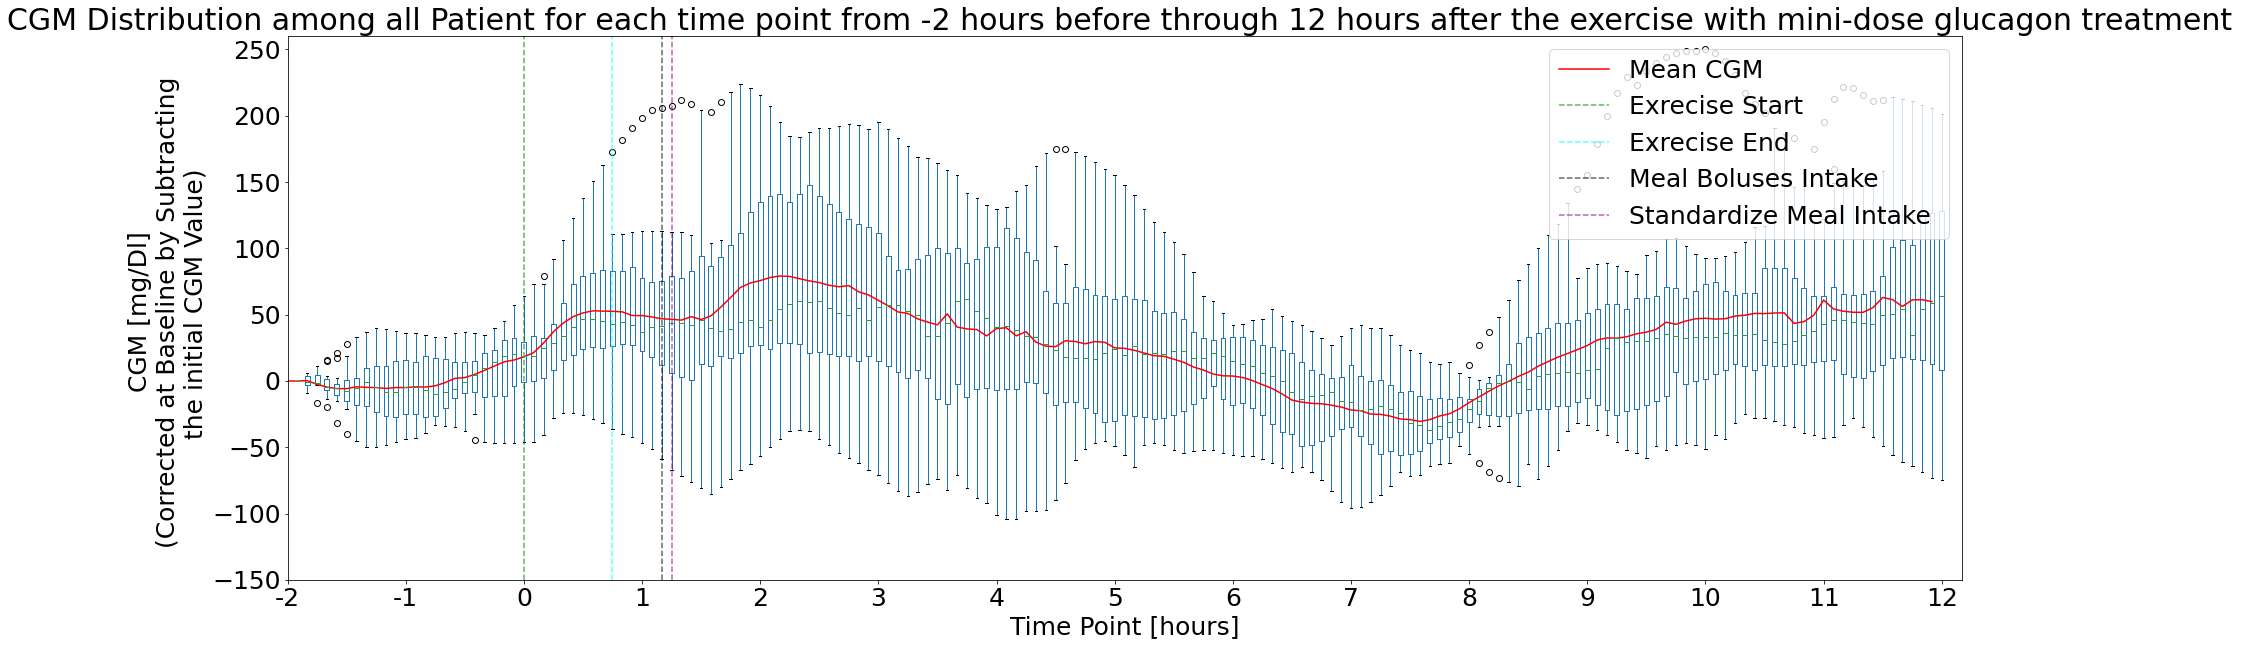

In [31]:
#plotting the patient-wise boxplot

df_mdg_ex_pw = pd.DataFrame()

for patient_id in df_mdg_res.PtID.unique():
  df_mdg_ex_pw['PtID_'+str(patient_id)] = df_mdg_res[df_mdg_res.PtID==patient_id].Glucose.reset_index(drop=True) - df_mdg_res[df_mdg_res.PtID==patient_id].Glucose.iloc[0]


df_mdg_ex_pw.reset_index(drop=True).T.boxplot(grid=False, figsize=(30,10))
plt.plot(df_mdg_ex_pw.reset_index(drop=True).T.mean(), 'r', label='Mean CGM' )
plt.ylim([-150,260])
plt.xlim([0,len(df_mdg_ex_pw)+2])

plt.axvline(x =120/5, color = 'green', label = 'Exrecise Start', alpha=0.6, linestyle='--')
plt.axvline(x =(120+45)/5, color = 'cyan', label = 'Exrecise End', alpha=0.6, linestyle='--')
plt.axvline(x =(120+70)/5, color = 'black', label = 'Meal Boluses Intake ', alpha=0.6,linestyle='--')
plt.axvline(x =(120+75)/5, color = 'purple', label = 'Standardize Meal Intake ', alpha=0.6,linestyle='--')
plt.locator_params(axis='x', nbins=14)
plt.xticks(ticks=np.arange(0, len(df_not_ex_pw)+1, 12), labels=range(-2,13))
plt.legend(loc=1)
plt.xlabel('Time Point [hours]')
plt.ylabel('CGM [mg/Dl] \n' '(Corrected at Baseline by Subtracting \n' ' the initial CGM Value)' )
plt.title('CGM Distribution among all Patient for each time point from -2 hours before through 12 hours after the exercise with mini-dose glucagon treatment ')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/boxplot_data_distribution_mdg.png', dpi=200)

plt.show()

In [ ]:
df_mdg_ex_pw.shape , df_tabs_ex_pw.shape , df_dec_ex_pw.shape, df_not_ex_pw.shape

((168, 14), (168, 13), (168, 13), (168, 12))

# Creating Total Dataframe 

In [34]:
df_mdg_res.columns

Index(['Glucose', 'HeartRate', 'BHB', 'lactate', 'Glucagon', 'Cortisol',
       'Timepoint', 'Insulin', 'Carbs', 'Strategy', 'PtID'],
      dtype='object')

In [35]:
df_total_res = pd.concat([df_mdg_res, df_tabs_res, df_not_res, df_dec_res])
df_total_res.shape

(8736, 11)

In [36]:
# df_total = pd.concat([df_mdg, df_tabs, df_not, df_dec])[remained_cols]
# df_total.shape

In [37]:
rp.summary_cont(df_total_res.groupby(["PtID", "Strategy"])["Glucose"])


N      Mean       SD      SE  95% Conf.  Interval
PtID Strategy                                                     
1    DEC       164  107.2348  44.6717  3.4883   100.3467  114.1228
     MDG       158  134.0665  45.3819  3.6104   126.9352  141.1977
     NOT       157  134.1115  54.7781  4.3718   125.4760  142.7470
     TABS      157  142.4968  88.8044  7.0874   128.4972  156.4964
2    DEC       167  133.3952  44.7927  3.4662   126.5518  140.2387
     MDG       168  113.2827  27.7894  2.1440   109.0499  117.5156
     NOT       160  123.9344  49.3610  3.9023   116.2273  131.6415
     TABS      166  135.5753  32.8166  2.5471   130.5463  140.6043
5    DEC       166  147.0030  56.3944  4.3771   138.3608  155.6453
     MDG       150  136.5300  59.3070  4.8424   126.9614  146.0986
     NOT       168  163.0000  61.3023  4.7296   153.6625  172.3375
     TABS      166  150.8163  75.5696  5.8653   139.2355  162.3971
6    MDG       168  127.2560  41.1862  3.1776   120.9825  133.5294
     NOT       167  125.9461  38.4669  2.9767   120.0691  131.8231
     TABS      166  129.5663  49.3466  3.8300   122.0041  137.1285
9    DEC       164  114.3232  34.5056  2.6944   109.0027  119.6437
     MDG       167  130.4671  27.3387  2.1155   126.2902  134.6439
     NOT       161  103.1118  39.3168  3.0986    96.9924  109.2312
     TABS      168  123.3363  37.5713  2.8987   117.6135  129.0591
10   DEC       167  111.9431  32.2782  2.4978   107.0116  116.8746
     MDG       168  101.9673  27.2996  2.1062    97.8090  106.1255
     NOT       158  119.9684  35.4082  2.8169   114.4044  125.5323
     TABS      147  135.3503  42.8803  3.5367   128.3606  142.3401
11   DEC       166  125.4157  39.7735  3.0870   119.3205  131.5108
     MDG       168  146.0179  54.3623  4.1941   137.7375  154.2982
     NOT       167   96.2754  38.4021  2.9716    90.4084  102.1425
     TABS      166  128.0904  67.4289  5.2335   117.7571  138.4236
12   DEC       161  140.0932  41.4845  3.2694   133.6364  146.5500
     MDG       166  135.2108  75.7264  5.8775   123.6060  146.8157
     TABS      166  134.8916  48.0434  3.7289   127.5291  142.2541
13   DEC       164  127.0570  62.8624  4.9087   117.3641  136.7498
     MDG       156  177.3590  71.6039  5.7329   166.0343  188.6837
     TABS      164  171.6951  81.1085  6.3335   159.1888  184.2014
14   DEC       168  119.2054  39.0142  3.0100   113.2628  125.1479
     MDG       168  167.9137  48.5496  3.7457   160.5187  175.3087
     NOT       168  143.0268  50.0284  3.8598   135.4065  150.6470
     TABS      168  126.9315  44.8434  3.4597   120.1011  133.7620
15   DEC       162  113.8642  30.5333  2.3989   109.1268  118.6016
     MDG       162  105.8457  23.1304  1.8173   102.2569  109.4345
     NOT       164   95.9604  28.3512  2.2139    91.5888  100.3319
     TABS      157   99.6561  26.2043  2.0913    95.5251  103.7870
16   DEC       168  159.3065  75.2908  5.8088   147.8384  170.7747
     MDG       168  160.9077  52.9415  4.0845   152.8438  168.9717
     NOT       159  143.4025  30.3779  2.4091   138.6443  148.1608
     TABS      154  202.5552  73.9443  5.9586   190.7834  214.3270
18   DEC       166  116.3795  41.0262  3.1843   110.0924  122.6666
     MDG       163  141.2055  96.5725  7.5641   126.2685  156.1425
     NOT       144  131.3438  50.9672  4.2473   122.9482  139.7393
19   DEC       153  168.8268  87.6615  7.0870   154.8250  182.8286
     MDG       159  162.4025  67.4187  5.3466   151.8424  172.9626
     NOT       156  103.9615  49.6177  3.9726    96.1141  111.8090
     TABS      149  139.1275  83.2274  6.8183   125.6538  152.6012

**It appears from table above that, "Tabs" treatment is correlated with increase in Glucose level**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


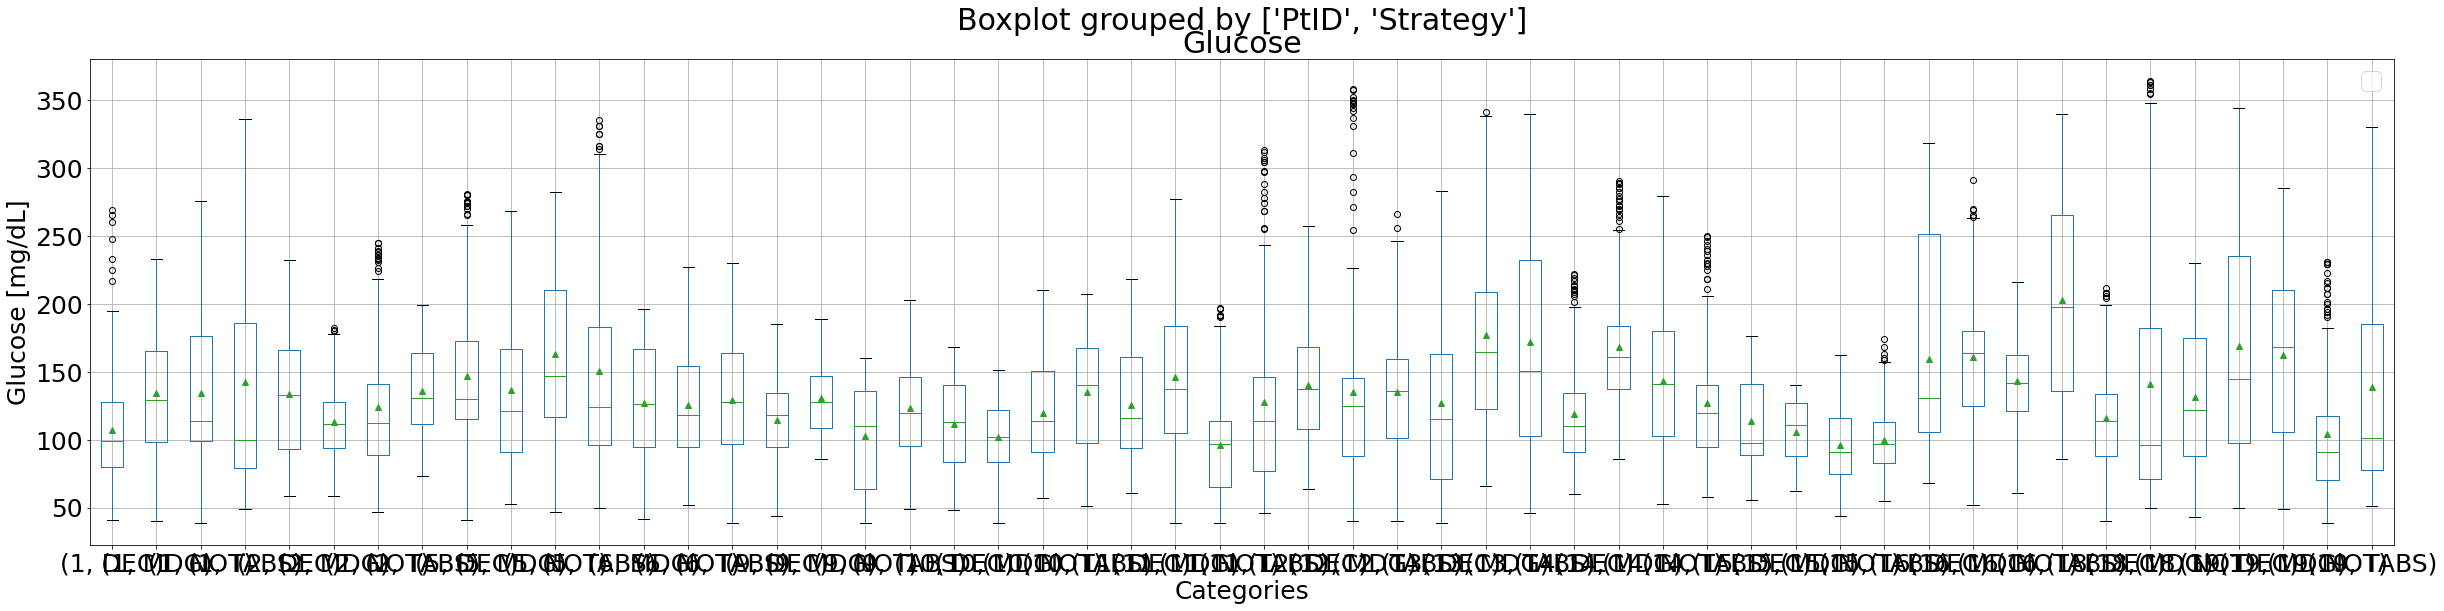

In [38]:
boxplot = df_total_res.boxplot(["Glucose"], by = ["PtID", "Strategy"],
                     figsize = (40, 9),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Categories")
boxplot.set_ylabel("Glucose [mg/dL]")
boxplot.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Glucose [mg/dL]')

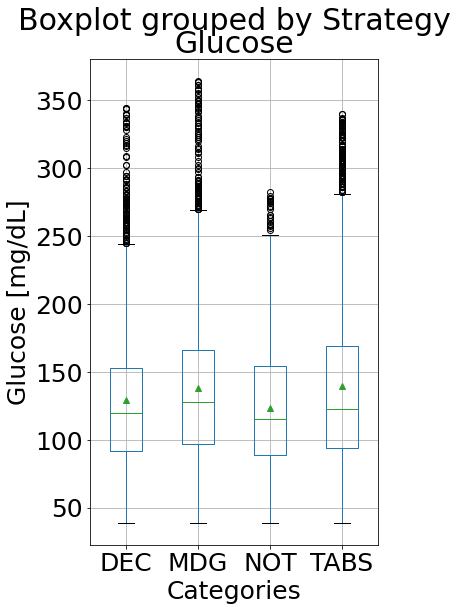

In [39]:
boxplot = df_total_res.boxplot(["Glucose"], by = [ "Strategy"],
                     figsize = (5, 9),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Categories")
boxplot.set_ylabel("Glucose [mg/dL]")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Glucose [mg/dL]')

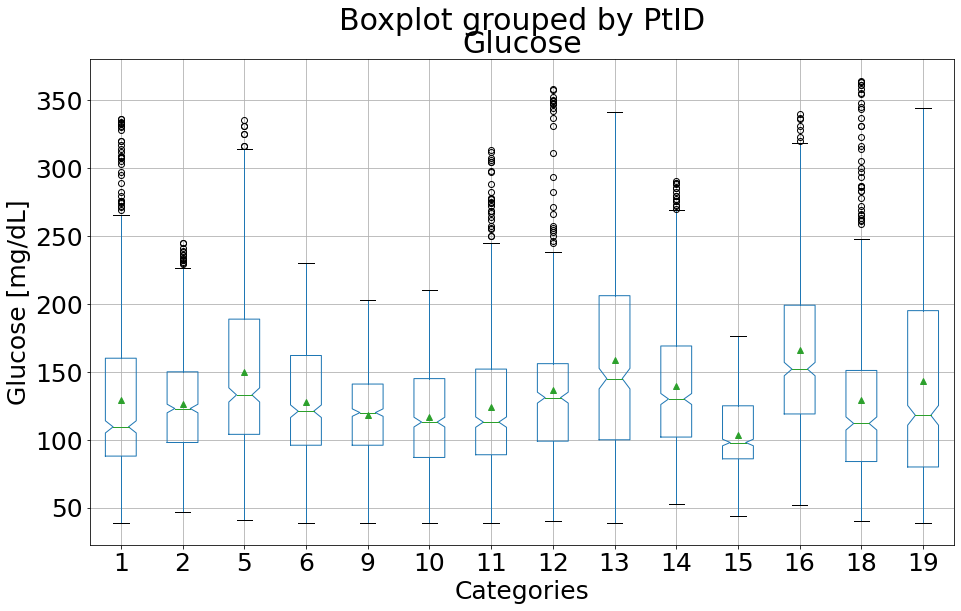

In [40]:
boxplot = df_total_res.boxplot(["Glucose"], by = [ "PtID"],
                     figsize = (15, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Categories")
boxplot.set_ylabel("Glucose [mg/dL]")

## Hypo dataframe

In [41]:
df_num_of_hpy0_total=pd.DataFrame()
num_hypo_0_5=[]
num_hypo_5_end=[]
for strategy in df_total_res.Strategy.unique():
  df_num_of_hpy0= pd.DataFrame({'interval':['-2H to +3H -'+strategy, '+3H to +12H -'+strategy]})
  for ptid in df_total_res[df_total_res.Strategy==strategy].PtID.unique():
    # df_total_res.loc[(df_total_res.Strategy==strategy) & (df_total_res.PtID==ptid)]

    df_strategy_patient= df_total_res.loc[(df_total_res.Strategy==strategy) & (df_total_res.PtID==ptid)]

    num_hypo_0_5_ = len(np.where(df_strategy_patient.iloc[0:(12*5)+1].Glucose<70)[0])
    num_hypo_5_end_ = len(np.where(df_strategy_patient.iloc[(12*5)+1:].Glucose<70)[0])
    df_num_of_hpy0['Pt_'+str(ptid)] = [num_hypo_0_5_ , num_hypo_5_end_]
  df_num_of_hpy0_total = pd.concat([df_num_of_hpy0_total, df_num_of_hpy0 ])

df_num_of_hpy0_total= df_num_of_hpy0_total.reset_index().set_index('interval').drop(columns='index')


    # print(len(np.where(cc.iloc[0:(12*5)+1].Glucose<70)[0]) , len(np.where(cc.iloc[(12*5)+1:].Glucose<70)[0]))
df_num_of_hpy0_total_3_end = df_num_of_hpy0_total.iloc[[1,3,5,7]]
df_num_of_hpy0_total_start_3 = df_num_of_hpy0_total.iloc[[0,2,4,6]]

In [42]:
# plt.rcParams.update({'font.size': 12})


## plot -2 to 3 and 3 to end separately for hypoglycemia events (with outliers removed for 4 stds)

In [55]:
[[item.set_linewidth(4) for item in df_num_of_hpy0_total_start_3.T[key]['boxes']] for key in df_num_of_hpy0_total_start_3.T.keys()]
[[item.set_linewidth(4) for item in df_num_of_hpy0_total_start_3.T[key]['fliers']] for key in df_num_of_hpy0_total_start_3.T.keys()]
[[item.set_linewidth(4) for item in df_num_of_hpy0_total_start_3.T[key]['medians']] for key in df_num_of_hpy0_total_start_3.T.keys()]
[[item.set_linewidth(4) for item in df_num_of_hpy0_total_start_3.T[key]['means']] for key in df_num_of_hpy0_total_start_3.T.keys()]
[[item.set_linewidth(4) for item in df_num_of_hpy0_total_start_3.T[key]['whiskers']] for key in df_num_of_hpy0_total_start_3.T.keys()]
[[item.set_linewidth(4) for item in df_num_of_hpy0_total_start_3.T[key]['caps']] for key in df_num_of_hpy0_total_start_3.T.keys()]

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


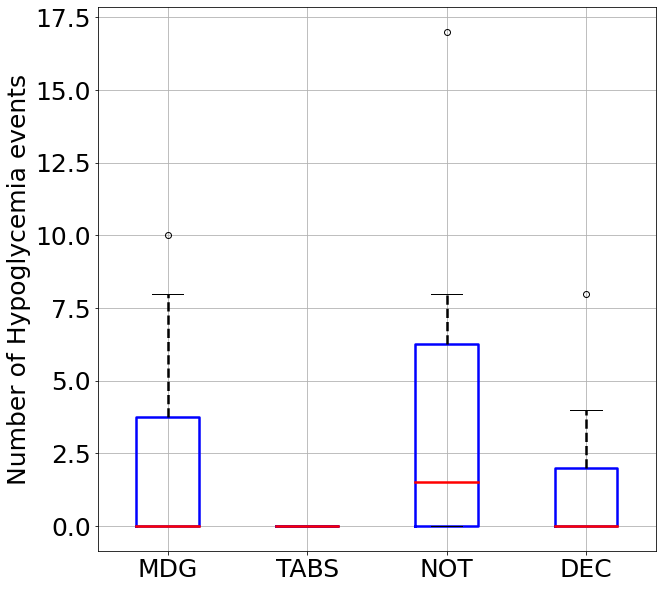

In [70]:
boxprops = dict(linestyle='-', linewidth=2.5, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='r')
whiskerprops = dict(linestyle='--'
                           , linewidth=2.5, color='k')
df_num_of_hpy0_total_start_3.T.boxplot(figsize=(10,10), showmeans=False,  boxprops=boxprops,
                medianprops=medianprops, 
                whiskerprops=whiskerprops)
# plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({'font.size': 20})

# plt.rc('font', size=9)  
# plt.title('Boxplot and whisker plot of number of hypoglycemia during exercise session for up to 3 hours')
# plt.title('During exercise session for up to 3 hours')

# plt.xticks(rotation = 45)
plt.xticks(labels=['MDG', 'TABS', 'NOT', 'DEC'], ticks=range(1,5))
plt.ylabel('Number of Hypoglycemia events')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/documents/boxplot_hypo_start_3.png', dpi=200)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


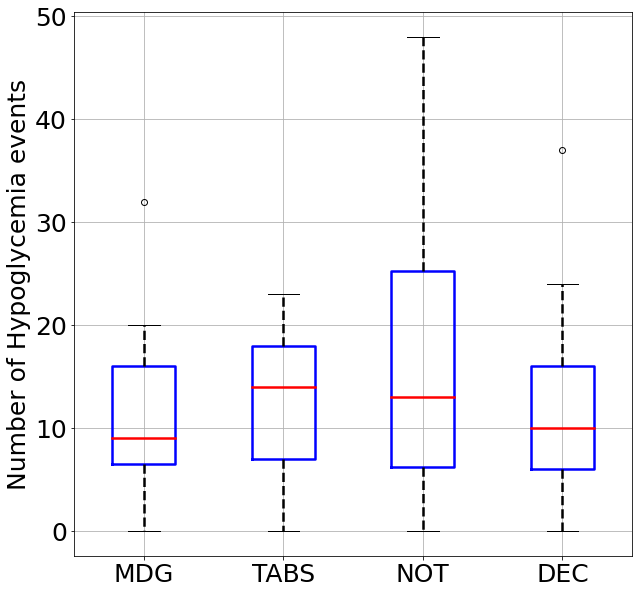

In [69]:
boxprops = dict(linestyle='-', linewidth=2.5, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='r')
whiskerprops = dict(linestyle='--'
                           , linewidth=2.5, color='k')
df_num_of_hpy0_total_3_end.T.boxplot(figsize=(10,10), showmeans=False, boxprops=boxprops,
                medianprops=medianprops, 
                whiskerprops=whiskerprops )

# plt.rcParams.update({'font.size': 20})
# plt.title('Boxplot and whisker plot of number of hypoglycemia for period 3-12 hours after start of exercise')
# plt.title('3-12 hours after start of exercise')
plt.xticks(labels=['MDG', 'TABS', 'NOT', 'DEC'], ticks=range(1,5))

plt.ylabel('Number of Hypoglycemia events')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/documents/boxplot_hypo_3_end.png', dpi=200)

## Hypre Dataframe

In [63]:
df_num_of_hyper0_total=pd.DataFrame()
num_hypo_0_5=[]
num_hypo_5_end=[]
for strategy in df_total_res.Strategy.unique():
  df_num_of_hyper0= pd.DataFrame({'interval':['-2H to +3H -'+strategy, '+3H to +12H -'+strategy]})
  for ptid in df_total_res[df_total_res.Strategy==strategy].PtID.unique():

    df_strategy_patient= df_total_res.loc[(df_total_res.Strategy==strategy) & (df_total_res.PtID==ptid)]

    num_hyper_0_5_ = len(np.where(df_strategy_patient.iloc[0:(12*5)+1].Glucose>180)[0])
    num_hyper_5_end_ = len(np.where(df_strategy_patient.iloc[(12*5)+1:].Glucose<180)[0])
    df_num_of_hyper0['Pt_'+str(ptid)] = [num_hyper_0_5_ , num_hyper_5_end_]
  df_num_of_hyper0_total = pd.concat([df_num_of_hyper0_total, df_num_of_hyper0 ])



df_num_of_hyper0_total =df_num_of_hyper0_total.reset_index().set_index('interval').drop(columns='index')
# df_num_of_hyper0_total.T.boxplot(figsize=(15,10))

df_num_of_hyper0_total_3_end = df_num_of_hyper0_total.iloc[[1,3,5,7]]
df_num_of_hyper0_total_start_3 = df_num_of_hyper0_total.iloc[[0,2,4,6]]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


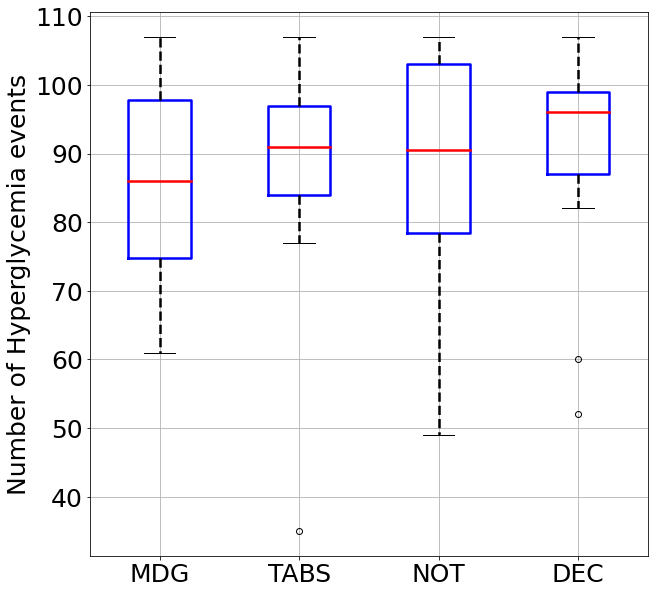

In [67]:
boxprops = dict(linestyle='-', linewidth=2.5, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='r')
whiskerprops = dict(linestyle='--'
                           , linewidth=2.5, color='k')
df_num_of_hyper0_total_3_end.T.boxplot(figsize=(10,10), showmeans=False, boxprops=boxprops,
                medianprops=medianprops, 
                whiskerprops=whiskerprops)
# plt.title('Boxplot and whisker plot of number of hyperglycemia for period 3-12 hours after start of exercise')

# plt.title('3-12 hours after start of exercise')

plt.xticks(labels=['MDG', 'TABS', 'NOT', 'DEC'], ticks=range(1,5))

plt.ylabel('Number of Hyperglycemia events')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/documents/boxplot_hyper_3_end.png', dpi=200)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


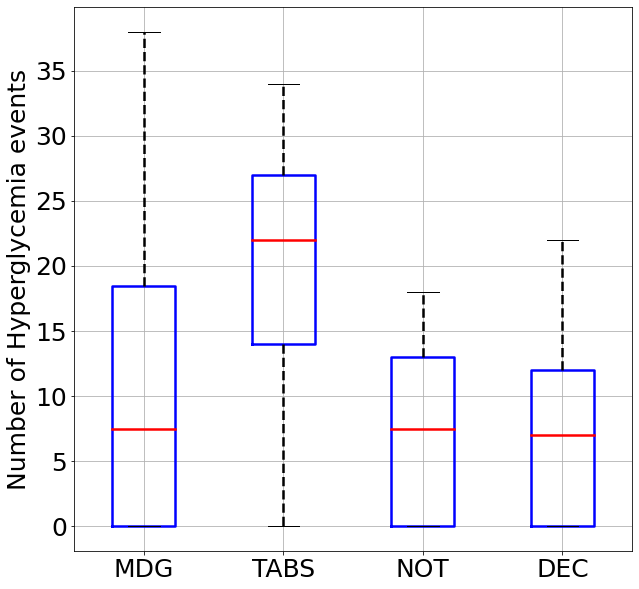

In [68]:
boxprops = dict(linestyle='-', linewidth=2.5, color='b')
medianprops = dict(linestyle='-', linewidth=2.5, color='r')
whiskerprops = dict(linestyle='--'
                           , linewidth=2.5, color='k')
df_num_of_hyper0_total_start_3.T.boxplot(figsize=(10,10),  showmeans=False, boxprops=boxprops,
                medianprops=medianprops, 
                whiskerprops=whiskerprops)
# plt.title('Boxplot and whisker plot of number of hyperglycemia event during exercise session for up to 3 hours')
plt.ylabel('Number of Hyperglycemia events')
# plt.title('During exercise session for up to 3 hours')

plt.xticks(labels=['MDG', 'TABS', 'NOT', 'DEC'], ticks=range(1,5))

plt.savefig('/content/drive/MyDrive/Colab Notebooks/LMEM-SHAP/documents/boxplot_hyper_start_3.png', dpi=200)

In [ ]:
df_num_of_hyper0_total_3_end

,index,Pt_1,Pt_2,Pt_5,Pt_6,Pt_9,Pt_10,Pt_11,Pt_12,Pt_13,Pt_14,Pt_15,Pt_16,Pt_18,Pt_19
interval,,,,,,,,,,,,,,,
+3H to +12H -MDG,1,88,104,73,86.0,107,107,83,86.0,71.0,87,101,67,61.0,80
+3H to +12H -TABS,1,84,97,93,89.0,107,78,104,91.0,77.0,106,97,35,NaN,84
+3H to +12H -NOT,1,83,82,57,106.0,103,102,107,NaN,NaN,68,103,90,49.0,91
+3H to +12H -DEC,1,97,82,87,NaN,98,107,96,88.0,87.0,101,101,60,99.0,52


In [ ]:
plt.rcParams.update({'font.size': 12})
# 

In [ ]:
df_total_res[df_total_res.Glucose<70]

,Glucose,HeartRate,BHB,lactate,Glucagon,Cortisol,Timepoint,Insulin,Carbs,Strategy,PtID
new_time,,,,,,,,,,,
2022-10-19 15:40:00,67.0,NaN,NaN,NaN,NaN,NaN,420.0,0.0,0.0,MDG,1
2022-10-19 15:45:00,61.0,NaN,NaN,NaN,NaN,NaN,425.0,0.0,0.0,MDG,1
2022-10-19 15:50:00,55.0,NaN,NaN,NaN,NaN,NaN,430.0,0.0,0.0,MDG,1
2022-10-19 15:55:00,48.0,NaN,NaN,NaN,NaN,NaN,435.0,0.0,0.0,MDG,1
2022-10-19 16:00:00,43.0,NaN,NaN,NaN,NaN,NaN,440.0,0.0,0.0,MDG,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26 15:21:00,68.0,NaN,NaN,NaN,NaN,NaN,441.0,0.0,0.0,DEC,19
2022-10-26 16:01:00,69.0,NaN,NaN,NaN,NaN,NaN,481.0,0.0,0.0,DEC,19
2022-10-26 16:06:00,64.0,NaN,NaN,NaN,NaN,NaN,486.0,0.0,0.0,DEC,19


In [ ]:
df_total_res[(df_total_res.Strategy=='MDG') &(df_total_res.PtID==1)].Glucose.sum()

21182.5

In [ ]:
df_total_res_sum_glucose = df_total_res

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i i

In [ ]:
df_auc_glucose = pd.DataFrame(data = auc , columns=['ptid', 'strategy', 'auc'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Glucose [mg/dL]')

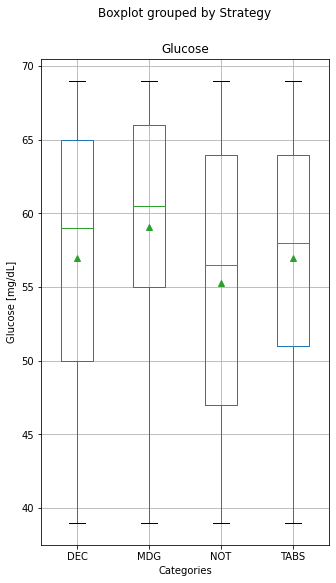

In [ ]:
boxplot = df_total_res[df_total_res.Glucose<70].boxplot(["Glucose"], by = [ "Strategy"],
                     figsize = (5, 9),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Categories")
boxplot.set_ylabel("Glucose [mg/dL]")

# df_total_res[df_total_res.Glucose<70]

In [ ]:
!pip install -q statsmodels


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# data = sm.datasets.get_rdataset('dietox', 'geepack').data


In [ ]:
df_total.shape

(43680, 16)

In [ ]:
md = smf.mixedlm("Glucose ~ PtID", df_total, groups = ["PtID", "Strategy"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

ValueError: ignored

## Arguments:(smf.mixedlm() )
group: random variable
a ~ b ==> a: target (outcome) var , b: fixed vars used to predict the outcome var 

In [ ]:
md = smf.mixedlm("Weight ~ Time", df_total, groups=df_total["Pig"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            



TypeError: ignored

In [ ]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")


In [ ]:
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())